In [19]:
import os, sys
import numpy as np
from astropy import units
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from astropy.table import Table, Column
from scipy.optimize import minimize
from lightkurve.lightcurve import LightCurve
from scipy.signal import find_peaks


%load_ext autoreload
%autoreload 2
sys.path.append('/Users/arcticfox/Documents/GitHub/cos_flares/src/')
from utils import *
from cos_flares import FlaresWithCOS

plt.rcParams['font.size'] = 18
wavelength, flux, err = load_binned_data('/Users/arcticfox/Documents/AUMic/reduced/binned_data_a.npy')
wavelength2, flux2, err2 = load_binned_data('/Users/arcticfox/Documents/AUMic/reduced2/binned_data2.npy')

times = np.load('/Users/arcticfox/Documents/AUMic/reduced/times.npy')
orbits = np.load('/Users/arcticfox/Documents/AUMic/reduced/orbits.npy')
times2 = np.load('/Users/arcticfox/Documents/AUMic/reduced2/times.npy')
orbits2 = np.load('/Users/arcticfox/Documents/AUMic/reduced2/orbits.npy')+5

wavelength = np.full(flux.shape, wavelength)
wavelength2 = np.full(flux2.shape, wavelength2)

flare_mask = np.load('/Users/arcticfox/Documents/AUMic/flare_mask.npy',
                     allow_pickle=True)

parula = np.load('/Users/arcticfox/parula_colors.npy')

distance = (9.79*units.pc).to(units.cm)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
fwc = FlaresWithCOS(wavelength=np.append(wavelength, wavelength2, axis=0), 
                    flux=np.append(flux, flux2, axis=0),
                    flux_err=np.append(err, err2, axis=0), 
                    time=np.append(times, times2)-times[0], 
                    orbit=np.append(orbits, orbits2))
fwc.load_line_table(path='/Users/arcticfox/Documents/GitHub/cos_flares/')

In [4]:
fwc.measure_FUV130()

for ion in fwc.line_table['ion']:
    fwc.measure_ew(ion)

In [5]:
%load_ext autoreload
%autoreload 2
from plot_utils import make_tworow

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
visit2_time = np.append(times,times2)-times2[0]

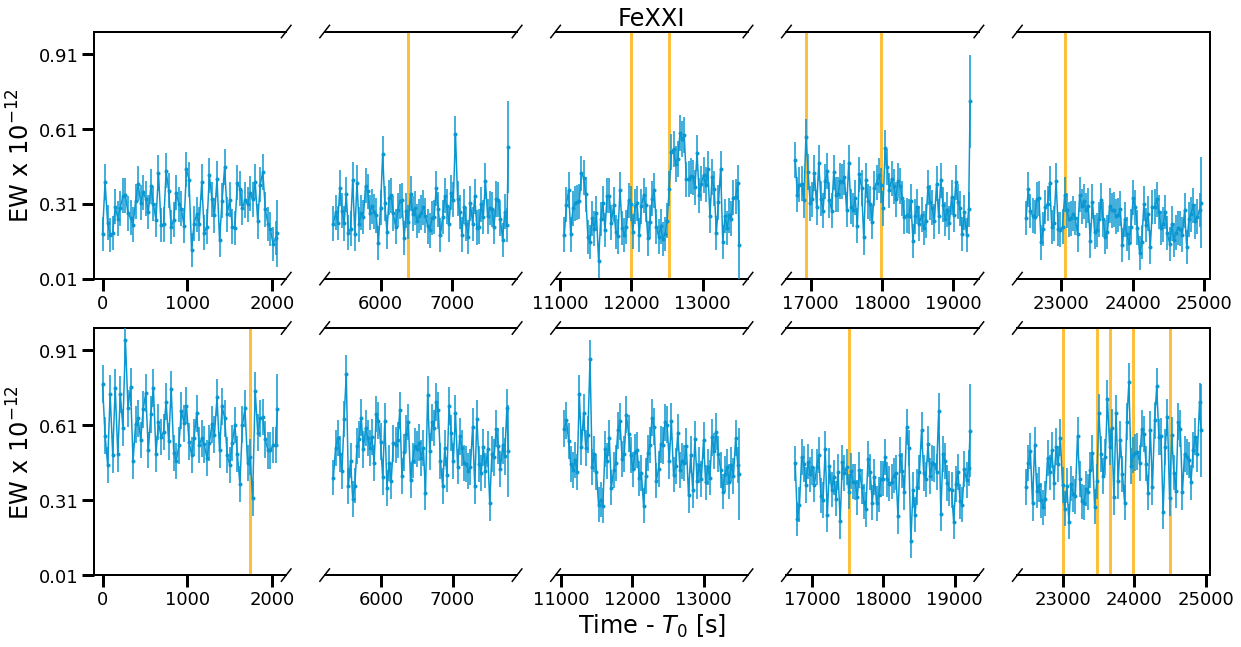

In [47]:
iron = [i for i in fwc.width_table.colnames if 'Fe' in i]

fig, axes = make_tworow()


for i in range(len(axes)):
    q = fwc.orbit == i
    
    if i < 5:
        t = fwc.time.value + 0.0
    else:
        t = visit2_time + 0.0
        
    
    axes[i].errorbar(t[q],
                     fwc.width_table[iron[1]].data[q], 
                     yerr=fwc.error_table[iron[1]].data[q]/10,
                     marker='.',  color=parula[80], zorder=3)
    
    inds = np.where(np.array(flare_mask[1])==i)[0]
    if len(inds)>0:
        for n in inds:
            argmax = np.argmax(fwc.width_table['SiIII'][flare_mask[2][n]>0])
            axes[i].vlines(t[flare_mask[2][n]>0][argmax],
                           0, 1, color=parula[215], lw=3, zorder=1)#, linestyle='--')
    
    if i == 2:
        axes[i].set_title(iron[1], fontsize=24)
        
    #axes[i].set_ylim(0.9e-12,1e-14)
    axes[i].set_ylim(1e-14,1e-12)
        
    if i == 0 or i == 5:
        axes[i].set_ylabel('EW x 10$^{-12}$', fontsize=24)
        axes[i].set_yticks(np.arange(1e-14,1e-12, 3e-13))
        axes[i].set_yticklabels(np.arange(1e-14,1e-12, 3e-13)/1e-12)
    if i == 7:
        axes[i].set_xlabel('Time - $T_0$ [s]', fontsize=24)
#plt.savefig('/Users/arcticfox/Documents/AUMic/figures/FeXXI.png', dpi=250,
#            rasterize=True, bbox_inches='tight')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterize" which is no longer supported as of 3.3 and will become an error two minor releases later


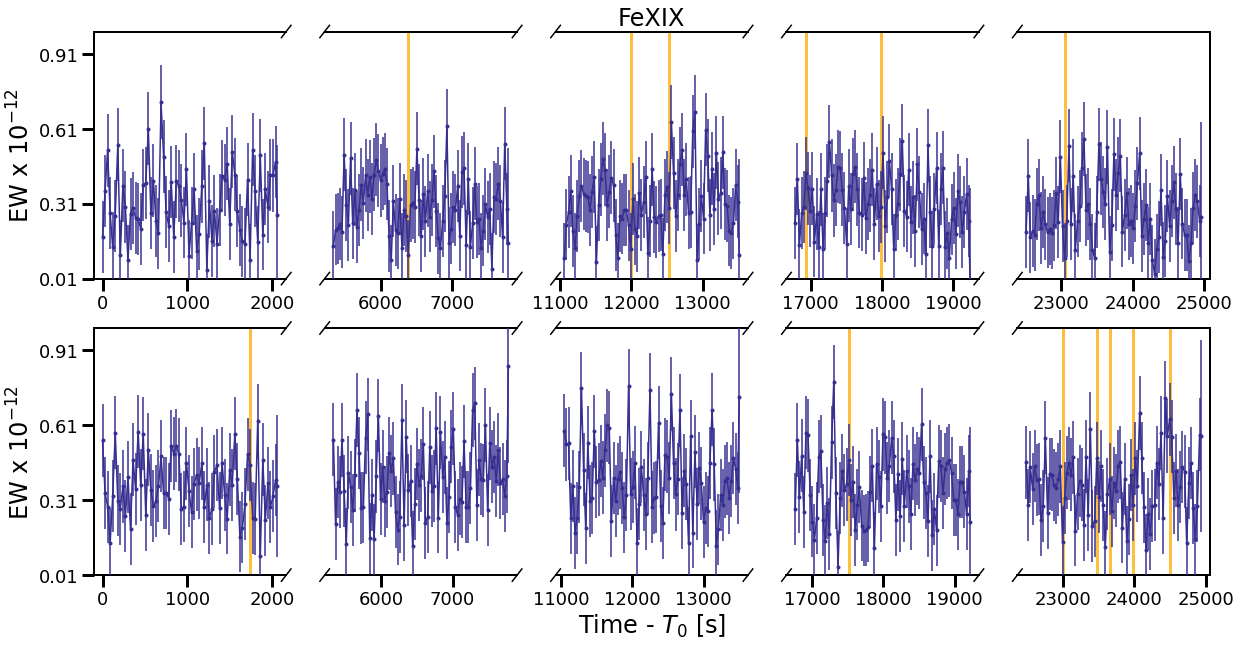

In [48]:
iron = [i for i in fwc.width_table.colnames if 'Fe' in i]

fig, axes = make_tworow()


for i in range(len(axes)):
    q = fwc.orbit == i
    
    if i < 5:
        t = fwc.time.value + 0.0
    else:
        t = visit2_time + 0.0
    
    axes[i].errorbar(t[q],
                     fwc.width_table[iron[0]].data[q], 
                     yerr=fwc.error_table[iron[0]].data[q]/10,
                     marker='.',  color=parula[3], zorder=3)
    
    inds = np.where(np.array(flare_mask[1])==i)[0]
    if len(inds)>0:
        for n in inds:
            argmax = np.argmax(fwc.width_table['SiIII'][flare_mask[2][n]>0])
            axes[i].vlines(t[flare_mask[2][n]>0][argmax],
                           0, 1, color=parula[215], lw=3, zorder=1)#, linestyle='--')
    
    if i == 2:
        axes[i].set_title(iron[0], fontsize=24)
        
    #axes[i].set_ylim(0.9e-12,1e-14)
    axes[i].set_ylim(1e-14,1e-12)
        
    if i == 0 or i == 5:
        axes[i].set_ylabel('EW x 10$^{-12}$', fontsize=24)
        axes[i].set_yticks(np.arange(1e-14,1e-12, 3e-13))
        axes[i].set_yticklabels(np.arange(1e-14,1e-12, 3e-13)/1e-12)
    if i == 7:
        axes[i].set_xlabel('Time - $T_0$ [s]', fontsize=24)
plt.savefig('/Users/arcticfox/Documents/AUMic/figures/FeXIX.png', dpi=250,
            rasterize=True, bbox_inches='tight')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
//anaconda3/l

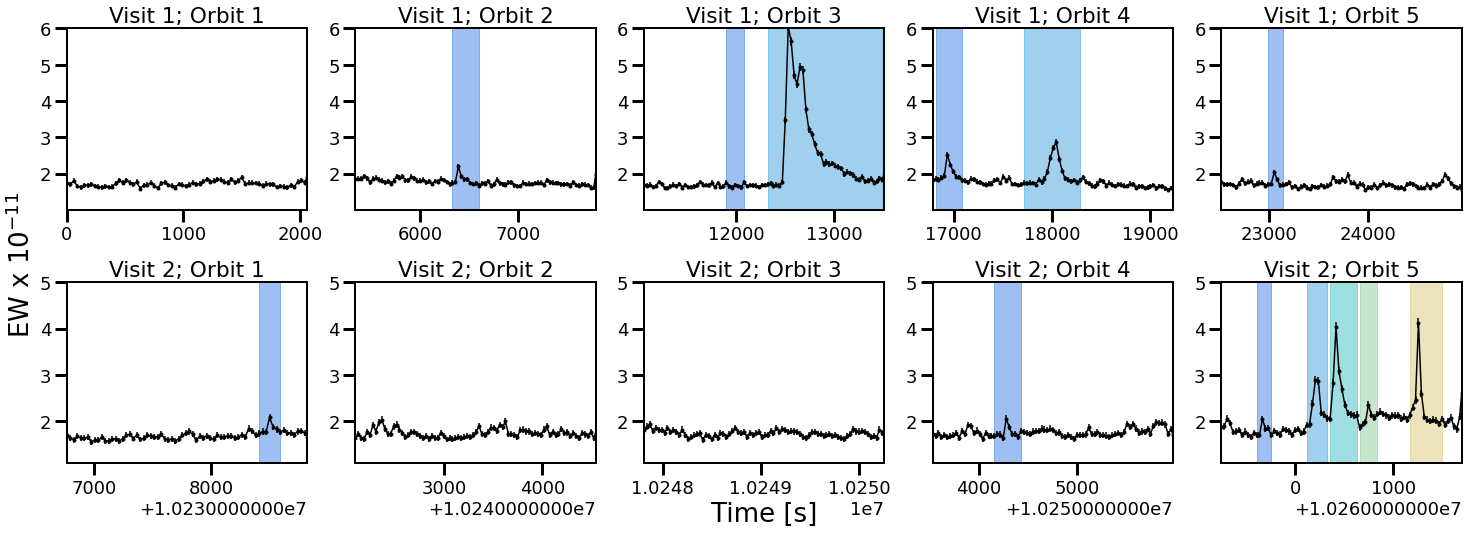

In [54]:
diff = np.where(np.diff(fwc.time.value)>100000)[0]
diff = [0, diff[0], len(fwc.time)-1]

fig, axes = plt.subplots(figsize=(25,8), nrows=2, ncols=5)
fig.set_facecolor('w')
axes = axes.reshape(-1)

f_tot = np.full((20,len(fwc.time.value)), False)
x = 0
a = 0
which_o = []
for i in range(len(diff)-1):
    if i == 0:
        jr = [0,5]
        axes[a].set_ylim(1e-13,4e-11)
    else:
        jr = [5,10]
        
        
    for j in range(jr[0], jr[1]):
        mask = np.where((fwc.time.value>=fwc.time.value[diff[i]]) &
                        (fwc.time.value<=fwc.time.value[diff[i+1]]) &
                        (fwc.orbit==j))
        axes[a].errorbar(fwc.time.value[mask], 
                     fwc.width_table['CIII'][mask], 
                     yerr=fwc.error_table['CIII'][mask]/3, 
                     marker='.', color='k',
                     linestyle='')
        axes[a].plot(fwc.time.value[mask], 
                     fwc.width_table['CIII'][mask], 'k')

        
        if j == 1:
            f = ((fwc.time.value>=6300) & (fwc.time.value<=6600))
            f = f.reshape((1,len(f)))
            which_o.append(j)
        elif j == 2:
            f1 = ((fwc.time.value>=11900) & (fwc.time.value<=12100))
            f2 = ((fwc.time.value>=12300) & (fwc.time.value<=13500)) 
            f = np.array([f1, f2])
            which_o.append(j)
            which_o.append(j)
        elif j == 3:
            f1 = ((fwc.time.value>=16800) & (fwc.time.value<=17100) )
            f2 = ((fwc.time.value>=17700) & (fwc.time.value<=18300) ) 
            f = np.array([f1, f2])
            which_o.append(j)
            which_o.append(j)
        elif j == 4:
            f1 = ((fwc.time.value>=22970) & (fwc.time.value<=23150) )
            f = np.array([f1])
            which_o.append(j)
        elif j == 5:
            f = ((fwc.time.value>=10238383) & (fwc.time.value<=10238593))
            f = f.reshape((1,len(f)))
            which_o.append(j)
        elif j == 8:
            f = ((fwc.time.value>=10254152) & (fwc.time.value<=10254452))
            f = f.reshape((1,len(f)))
            which_o.append(j)
        elif j == 9:
            f0 = ((fwc.time.value>=10259581) & (fwc.time.value<=10259781))
            f1 = ((fwc.time.value>=10260101) & (fwc.time.value<=10260351))
            f2 = ((fwc.time.value>10260351) & (fwc.time.value<=10260651))
            f3 = ((fwc.time.value>10260651) & (fwc.time.value<=10260851))
            f4 = ((fwc.time.value>10261151) & (fwc.time.value<=10261501))
            f = np.array([f0, f1, f2, f3, f4])
            which_o.append(j)
            which_o.append(j)
            which_o.append(j)
            which_o.append(j)
            which_o.append(j)
        else:
            f = None
            
            
        if f is not None:
            for k in range(len(f)):
                f_tot[x] = f[k] 
                m1 = f[k] == True
                #axes[a].errorbar(fwc.time.value[m1], 
                #             fwc.width_table['CIII'][m1], 
                #             yerr=fwc.error_table['CIII'][m1]/3, 
                #             marker='.', color=parula[(k*40)+30],
                #             linestyle='')
                axes[a].axvspan(fwc.time.value[m1][0], fwc.time.value[m1][-1],
                                color=parula[(k*40)+30], alpha=0.4)
                x += 1
            
        if j < 5:
            axes[a].set_ylim(1e-13,5e-11)
        else:
            axes[a].set_ylim(1e-12,4e-11)
            if j == 5:
                axes[a].set_ylabel('EW x $ 10^{-11}$', y=1.1, fontsize=26)
            if j == 7:
                axes[a].set_xlabel('Time [s]', fontsize=26)
                
        axes[a].set_yticklabels([1,2,3,4,5,6])
        if j < 5:
            axes[a].set_title('Visit 1; Orbit {}'.format(j+1))
        else:
            axes[a].set_title('Visit 2; Orbit {}'.format(j-4))
        axes[a].set_xlim(fwc.time.value[mask][0], fwc.time.value[mask][-1])
        a += 1
plt.subplots_adjust(hspace=0.4)
#plt.savefig('/Users/arcticfox/Documents/AUMic/figures/allflares.png', dpi=250, rasterize=True,
#            bbox_inches='tight')

In [55]:
f_tot = np.delete(f_tot, np.arange(x,len(f_tot),1,dtype=int),axis=0)

In [56]:
f_int = np.zeros(f_tot.shape, dtype=int)
for i in range(len(f_tot)):
    f_int[i] = (f_tot[i]+0.0)*2**(i+1)

In [ ]:
np.save('/Users/arcticfox/Documents/AUMic/flare_mask.npy', [fwc.time, which_o, f_int])

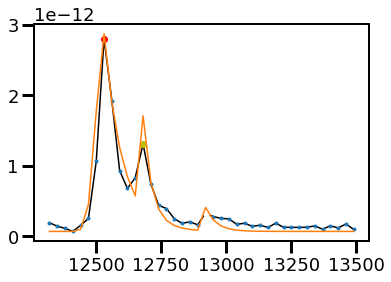

In [57]:
test = fwc.width_table['SiIII'][f_tot[2]==True] + 0.0
ttest = fwc.time[f_tot[2]==True]
plt.plot(ttest, test,'k')
plt.plot(ttest, test, '.')

p1 = np.argmax(test)
plt.plot(ttest[p1], test[p1], 'ro')

arg = np.where((ttest.value>ttest[p1].value+100))[0]
p2 = np.argmax(test[arg])
plt.plot(ttest[arg][p2], test[arg][p2], 'yo')

arg3 = np.where((ttest.value>ttest[arg][p2].value+100))[0]
p3 = np.argmax(test[arg3])
plt.plot(ttest[arg3][p3], test[arg3][p3], 'wo')

t0 = np.array([ttest[p1].value, ttest[arg][p2].value, ttest[arg3][p3].value])
amp = np.array([test[p1], test[arg][p2], test[arg3][p3]])#/1e-13
decay = np.array([70, 30, 40])
rise= np.array([30, 0.001, 0.001])

m = fwc.flare_model(t0=t0, amp=amp, decay=decay, rise=rise, t=ttest.value)
plt.plot(ttest, m+np.nanmin(test))

In [58]:
%load_ext autoreload
%autoreload 2
sys.path.append('/Users/arcticfox/Documents/GitHub/cos_flares/src/')
from utils import *
from cos_flares import FlaresWithCOS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
x, model = fwc.fit_flare('SiIII', f_tot[2]==True, nflares=3, amp=amp,
                          t0=t0, decay=decay, rise=rise)
nflares = 3

In [83]:
mask = f_tot[2]==True
ion = 'SiIII'


def chiSquare(args, x, y, yerr):
    global nflares

    amp   = args[0:nflares] + 0.0
    t0    = args[nflares:nflares*2] + 0.0
    rise  = args[nflares*2:nflares*3] + 0.0
    decay = args[nflares*3:nflares*4] + 0.0
    #offset = args[-1] + 0.0

    model = fwc.flare_model(t=x, t0=t0, amp=amp,
                             decay=decay, rise=rise)
    model += nanmin(fu)
    print( np.nansum( (y-model)**2.0 / yerr**2.0 ))
    return np.nansum( (y-model)**2.0 / yerr**2.0 )

time = fwc.time[mask].value
flux = np.array(fwc.width_table[ion][mask]) + 0.0
flux_err = np.array(fwc.error_table[ion][mask]) + 0.0

x0 = np.zeros(4*nflares + 1)
bounds = np.zeros((4*nflares+1,2))

guess = [amp, t0, rise, decay]
vbounds = [[flux.min(), flux.max()], [time.min(), time.max()],
           [0,100], [0,200]]

for i in range(4):
    x0[nflares*i : nflares*(i+1)] = guess[i]
    bounds[nflares*i : nflares*(i+1)] = vbounds[i]

#x0[-1] = 0
#bounds[-1] = [-5,5]

print(x0)

x = minimize(chiSquare,
             x0 = x0,
             bounds = bounds,
             args = (time, flux, flux_err),
             method='L-BFGS-B',
             tol=1e-9)

amp   = x.x[0:nflares] + 0.0
t0    = x.x[nflares:nflares*2] + 0.0
rise  = x.x[nflares*2:nflares*3] + 0.0
decay = x.x[nflares*3:nflares*4] + 0.0
offset = x.x[-1] + 0.0

m = fwc.flare_model(t=time, amp=amp,
                     t0=t0, rise=rise,
                     decay=decay) + offset

[2.80617554e-12 1.31231532e-12 3.29614204e-13 1.25309919e+04
 1.26809919e+04 1.29209919e+04 3.00000000e+01 1.00000000e-03
 1.00000000e-03 7.00000000e+01 3.00000000e+01 4.00000000e+01
 0.00000000e+00]
3.560712291554631
28.43247716743906
10.845585086997367
23.58418724880314
3.5607122898417685
3.560712291349553
3.560712291492728
3.5607122934543103
3.560712291554631
3.560712291554631
3.5607122914953484
3.560712291307105
3.56071229145972
3.560712291554631
6.787199116897113
34.12741651125993
6.34389244711024
9.496378246278574
6.787199114858539
6.787199116868738
6.787199205185242
6.78719911876914
6.787199116897113
6.787198879714243
6.787199116009128
6.787199116857749
6.787199116870014
6.787199116897113
3.560712291554631
28.43247716743906
10.845585086997367
23.58418724880314
3.5607122898417685
3.560712291349553
3.560712291492728
3.5607122934543103
3.560712291554631
3.560712291554631
3.5607122914953484
3.560712291307105
3.56071229145972
3.560712291554631


//anaconda3/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:579: RuntimeWarning: invalid value encountered in true_divide
  J_transposed[i] = df / dx


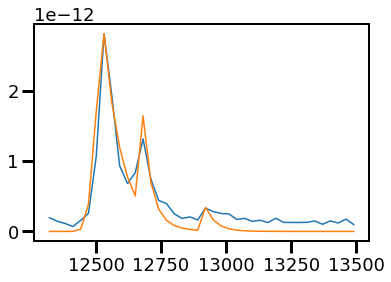

In [88]:
plt.plot(time,flux)
plt.plot(time, m)